# HW4 Q1

- Firstly, deviation describes how scattered a dataset is, so standard deviation also describes that attribute of the dataset.
- SEM, standard error of the mean, is the standard deviation of the new dataset formed by many bootstrapped means from the original dataset. Assume the deviation of the original dataset is $σ^2$, then $SEM^2$ equals $\frac {σ^2} {n}$ since we are calculating the means. By the way, bootstrapping is not necessary to obtain SEM since it simply equals $\sqrt \frac {σ^2} {n}$.
- Basically, SEM and standard deviation are obtained from different datasets.
- Numerically, SEM should be smaller than standard deviation as I mentioned in the second point.

# HW4 Q6
- Bootstrapping is randomly selecting $n$ samples (original sample size) from the original dataset (duplication is allowed) to form a new dataset.
- Purpose is to simulate cheap and new datasets without doing the real investigations. By analyzing these bootstrapped datasets, we can get more insights about the original dataset regardless its limited sample size.
- Firstly, create many bootstrapped datasets. Then, calculate their means and put them into a histogram. Finally, if the frequency of my estimated average is the highest, then probably my hypothesis cannot be rejected.

# HW4 Q8
I will apply both t-test and bootstrapping to confirm my conclusion.
## 1. T-test
Set the hypothesis first.
1. $H_0$: the vaccine is useless ($δ_{health} \leq 0$)
2. $H_1$: the vaccine is useful ($δ_{health} > 0$)
- where $δ_{health} = FinalHealthScore - InitialHealthScore$

- I assume datasets of $InitialHealthScore$ and $FinalHealthScore$ follow normal distribution so I can apply the t-test on them to get t-statistic and p-value
- I will apply a 5% significance level so any p-value less than 5% will be enough to reject $H0$

In [5]:
import pandas as pd
from scipy import stats

# Creating the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the difference between FinalHealthScore and InitialHealthScore
data['Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'], alternative='greater')

# Output the results
print(t_statistic) 
print(p_value)

2.5900615612703937
0.01460526190774628


- So t-statistic $\approx 2.590$ and p-value $\approx 0.015$
- Which means that two samples are about $2.590$ SEM of the differences between two samples apart, and $0.015<0.05$ indicates that we have enough evidence to reject $H0$
- In this t-test, SEM of the differences between two samples can be obtained by bootstrapping but not necessary since it can be directly obtained from formula

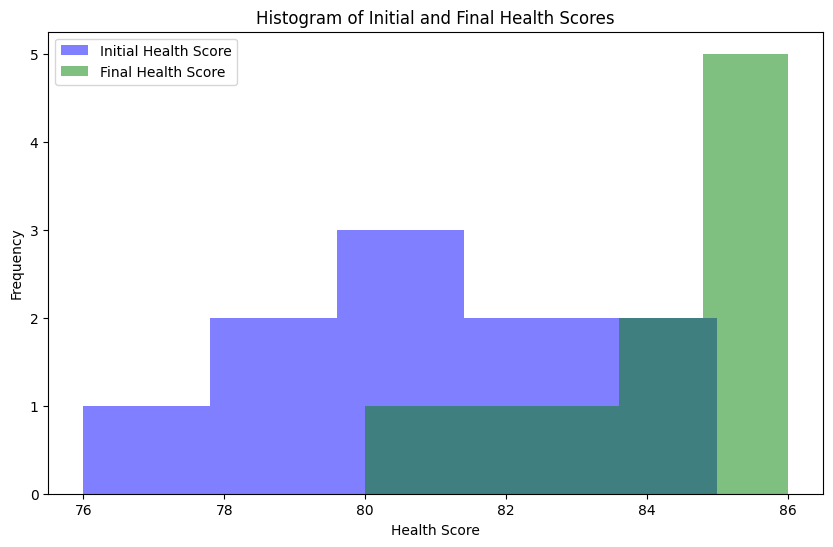

In [9]:
import matplotlib.pyplot as plt

# Plotting the histograms for FinalHealthScore and InitialHealthScore
plt.figure(figsize=(10, 6))

# Histogram for InitialHealthScore
plt.hist(data['InitialHealthScore'], bins=5, alpha=0.5, label='Initial Health Score', color='blue')

# Histogram for FinalHealthScore
plt.hist(data['FinalHealthScore'], bins=5, alpha=0.5, label='Final Health Score', color='green')

# Adding labels and title
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Histogram of Initial and Final Health Scores')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

- Here's a visualization so we can confirm that t-statistic $\approx 2.590$ is true
- Since $FinalHealthScore$ is shifted to right compared to $InitialHealthScore$

### T-test Conclusion
- $0.015<0.05$ so $H_0$ can be rejected, which implies $H_1$
- As a result, we can conclude that the vaccine is useful 

## 2. Bootstrapping

In order to double check my conclusion from t-test. I will create 10,000 bootstrapped datasets from the differences between $InitialHealthScore$ and $FinalHealthScore$, and then put the means into a histogram to judge my conclusion from t-test.

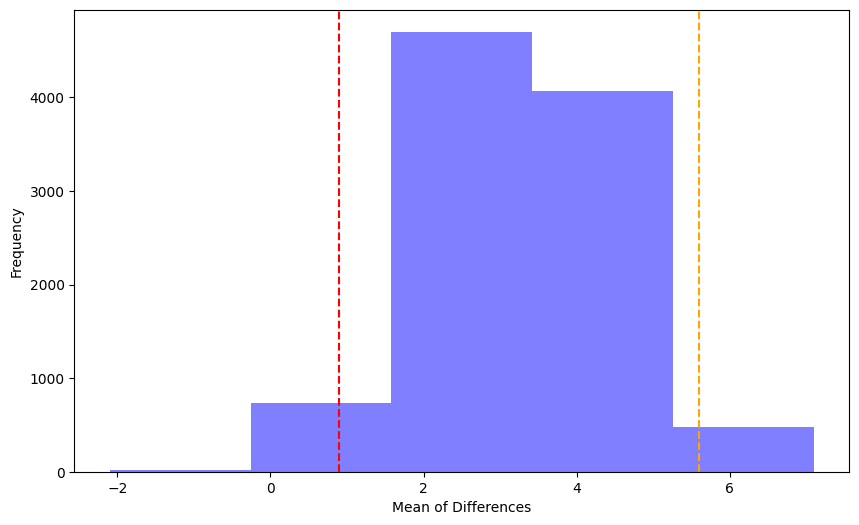

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bootstrap samples
n_iterations = 10000

# Store the bootstrap means
bootstrap_means = []

# Bootstrapping
for _ in range(n_iterations):
    # Resample the 'Difference' column with replacement
    bootstrap_sample = data['Difference'].sample(n=len(data), replace=True)
    # Calculate the mean of the resampled data and store it
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

plt.figure(figsize=(10, 6))

plt.hist(bootstrap_means, bins=5, alpha=0.5, label='Bootstrap Means', color='blue')

plt.xlabel('Mean of Differences')
plt.ylabel('Frequency')

plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% CI Lower Bound')
plt.axvline(x=confidence_interval[1], color='orange', linestyle='--', label='95% CI Upper Bound')

plt.show()


### Final Conclusion
- As we see, the most frequent mean is about 3 and the 95% confidence interval lies in the positive x-axis, which implies that the vaccine is useful
- This conclusion from bootstrapping further confirms t-test's conclusion
- Finally, we can safely draw the conclusion that the vaccine is useful

## GPT's summary
- https://chatgpt.com/share/66ff4b3e-b50c-8006-902d-aa688852328a